# Exercise 13

Using [abalones](../data/abalones.csv) dataset where the following variables are considered.

- `Gender` 
- `Length [mm]`
- `Diameter [mm]`
- `Height [mm]`
- `Full Size [mm]`
- `Meat Weight [mm]`
- `Viscera Weight [mm]`
- `Shell Weight [mm]`

In [12]:
library(ggplot2)
library(GGally)
abalones <- read.csv("../data/abalones.csv")

A simple regression model is proposed for the response variable `Length` and explanatory variable `Diameter`.

$$\hat{y} = \beta_0 + \beta_1X$$


Call:
lm(formula = Length ~ Diameter, data = abalones)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.299726 -0.010843  0.000032  0.010515  0.137215 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.036913   0.001273   29.01   <2e-16 ***
Diameter    1.194168   0.003032  393.90   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01944 on 4175 degrees of freedom
Multiple R-squared:  0.9738,	Adjusted R-squared:  0.9738 
F-statistic: 1.552e+05 on 1 and 4175 DF,  p-value: < 2.2e-16


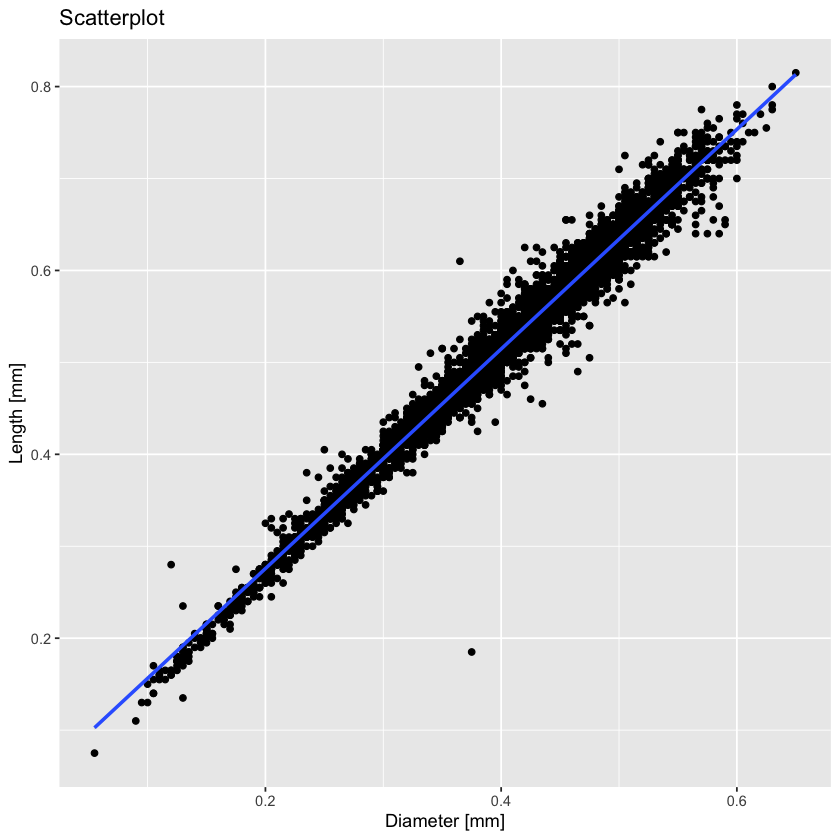

In [3]:
model <- lm(Length~Diameter, data=abalones)
summary(model)

ggplot(abalones, aes(x=Diameter, y=Length)) +
  geom_point() +
  geom_smooth(method="lm", formula = y~x) +
  labs(title="Scatterplot", x="Diameter [mm]", y="Length [mm]")

Then a multivariate regression model is proposed for $Y$ (Full size) based on the explanatory variables:

- $X_1$: Shell weight
- $X_2$: Viscera weight
- $X_3$: Meat weight

$$\hat{y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3$$

In [9]:
## Utiity function to plot regression line
plot_fn <- function(data, mapping, ...){
  p <- ggplot(data = data, mapping = mapping) +
    geom_point() +
    geom_smooth(method = lm, formula = y~x, fill = "blue", color = "blue", ...)
  p
}

## Utiity function to plot regression line without intercept
plot_fn2 <- function(data, mapping, ...){
  p <- ggplot(data = data, mapping = mapping) +
    geom_point() +
    geom_smooth(method=lm, formula = y~x-1, fill="blue", color="blue", ...)
  p
}

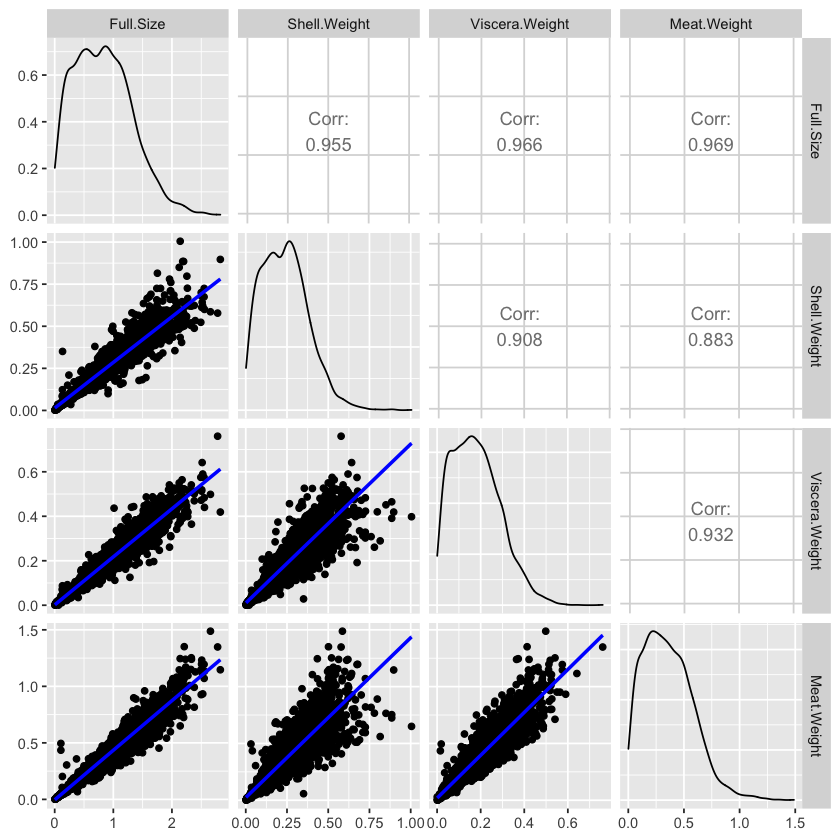

In [8]:
ggpairs(abalones,
        columns = c('Full.Size',
                    'Shell.Weight',
                    'Viscera.Weight',
                    'Meat.Weight'),
        lower = list(continuous = plot_fn))

Finally, three different models are proposed for full size based on diameters.

In [20]:
Y = abalones['Full.Size']
D = abalones['Diameter']
D2 = D^2
D3 = D^3
diameters <- data.frame(Y, D, D2, D3)

**Model 1**

$$\hat{y} = \beta_0 + \beta_1D$$ 

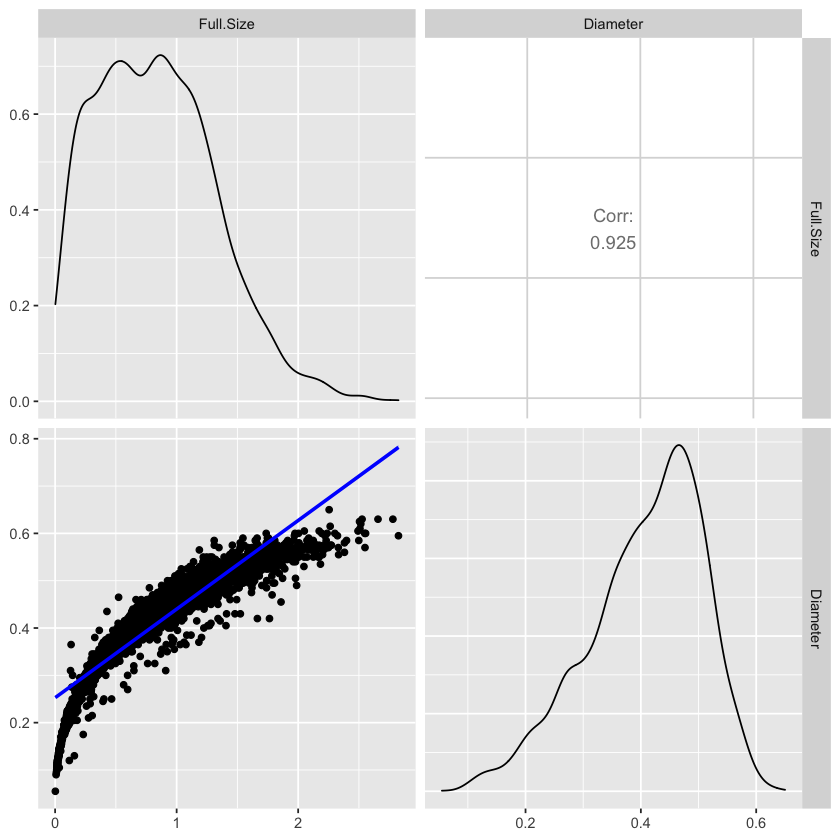

In [22]:
ggpairs(diameters,
        columns = c('Full.Size',
                    'Diameter'),
        lower = list(continuous = plot_fn))

**Model 2**

$$\hat{y} = \beta_0 + \beta_1D + \beta_2D^2$$ 

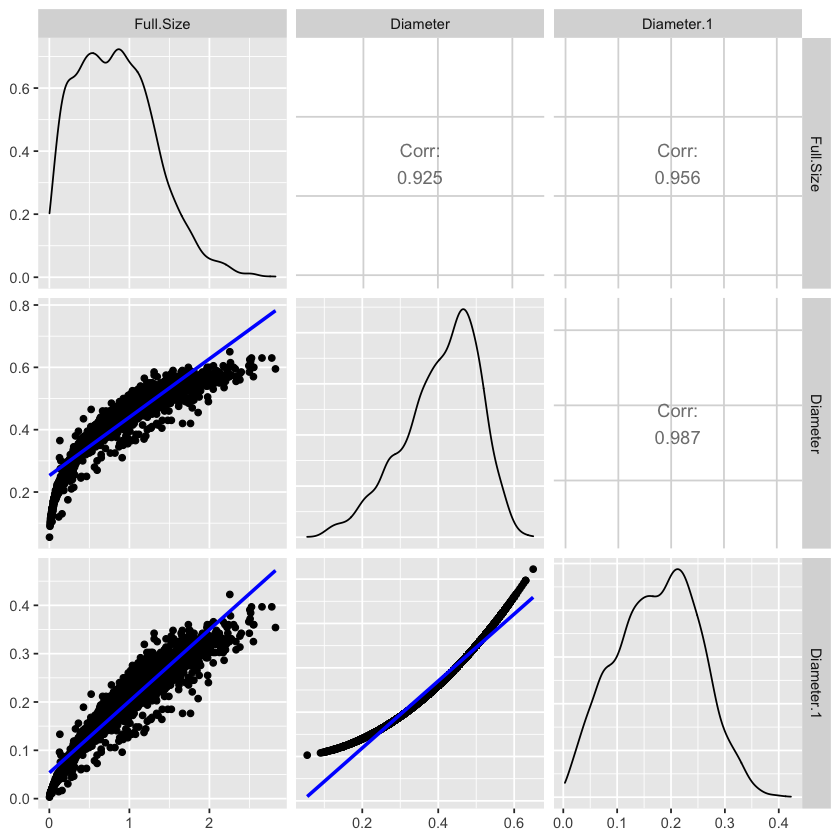

In [23]:
ggpairs(diameters,
        columns = c('Full.Size',
                    'Diameter',
                    'Diameter.1'),
        lower = list(continuous = plot_fn))

**Model 3**

$$\hat{y} = \beta_0 + \beta_1D^3$$ 

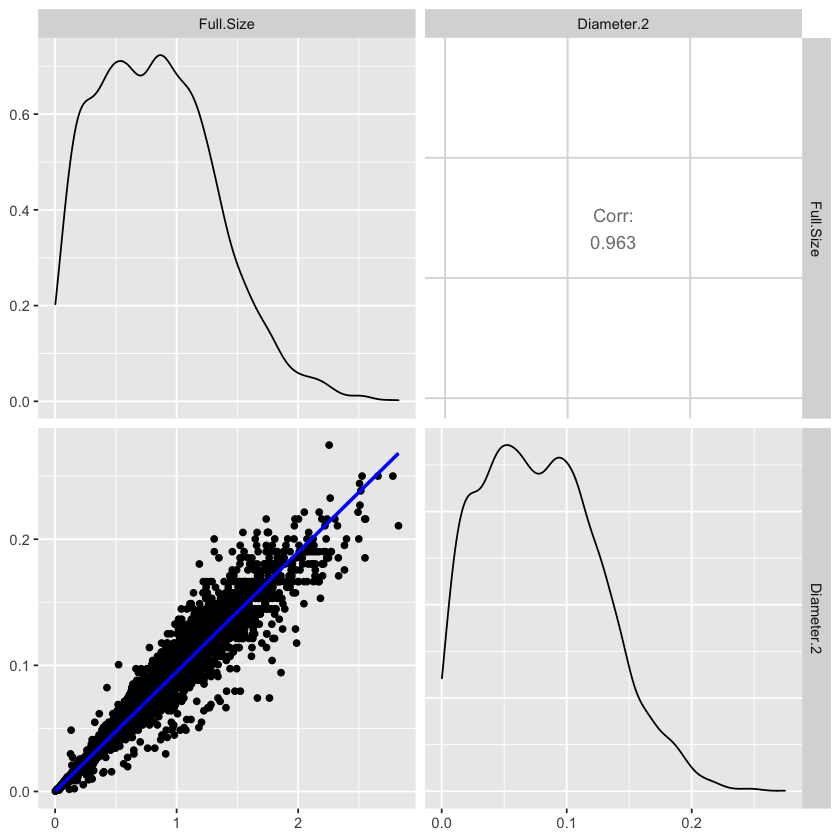

In [24]:
ggpairs(diameters,
        columns = c('Full.Size',
                    'Diameter.2'),
        lower = list(continuous = plot_fn2))